In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Intro to Stochastic Gradient Descent

### Outline
1. [Overview](#Overview)
2. [Optimization](#Optimization)
3. [Gradient Descent](#Gradient-Descent)
4. [Use in Machine Learning](#Use-In-Machine-Learning)
5. [Example (Logistic Regression)](#Example-(Logistic-Regression))



## Overview

Stochastic gradient descent is an iterative form of gradient descent which is used to optimize an objective function which is the sum of differentiable functions.

## Optimization

In optimization problems we typically seek to minimize or maximize a function usually referred to as an <strong>objective function</strong>  or <strong>loss function</strong>.  Since we can reframe a maximization problem as a minimization problem (i.e. minimize $-f(x)$ rather than maximizing $f(x)$), we will assume that our goal will be to minimize the objective function.

### Simple Optimization Example

Suppose we want to minimize the function $f(x) = x^2 + 4x$.  We can see by looking at the plot below that the minimum value for y is achieved for an x value around -2.5.

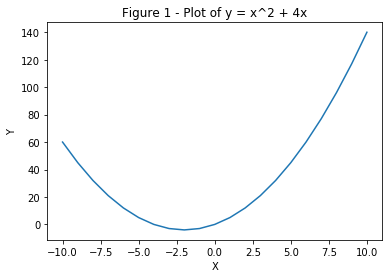

Minimum value =  -4


In [86]:
figure1()

However, we can find the exact minimum through the use of calculus. By calculating the first derivative with respect to x we can find the slope, or <strong>gradient</strong> of y for any given x.  By setting this first derivative equal to zero we are able to identify points at which the slope is equal to zero, and since we know that the minimum value must occur at a point where the slope is zero, by identifying these points and finding the correspoonding y values we are able to identify the x value which minimizes our function.  


$$ y = x^2 + 4x $$
Calculate the first derivative:
$$ \frac{dy}{dx} = 2x + 4$$
Set derivative = 0 and solve for x
$$ 2x + 4 = 0 $$
$$ 2x = -4 $$
$$ x = -2 $$

This indicates that the minimum value for y is achieved when x = -2, which is supported by the plot above, and matches our intuition based on that plot.

### Simple Multivariable Optimization Example

Now lets examine the situation where we are looking to optimize $f(x)$ with more than one input variable.  For simplicity, we'll look at the case of just two variables, $x_1 and x_2$, and minimize the equation $f(x) = {x_1}^2 + {x_2}^2 + 6x_1 -10x_2$, with corresponding plot below:

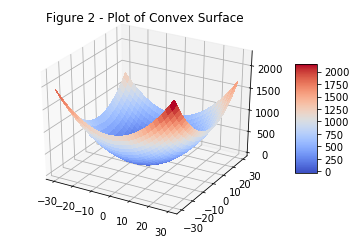

Minimum value =  -34


In [124]:
figure2()

We can again use calculus to identify a minimum, however, as there are multiple input variables we need to take the partial derivative with respect to each of them:

$$\frac{\partial(f(x))}{\partial{x_1}} = 2x_1 + 6$$
$$\frac{\partial(f(x))}{\partial{x_2}} = 2x_2 - 10$$
Setting each to zero and solving we get $x_1 = -3$ and $x_2 = 5$

Plugging these values into our equation we get -34, which is indeed the minimum value for $f(x)$.

### Generalizing

From this we can generalize to say that we want to find the vector $\theta$ that minimizes the function $f(\theta)$.  This can be accomplished analytically (by calculating the partial derivative of the function with respect to each element in $\theta$ and finding the points where $\frac{df(\theta)}{d\theta}=0$) for some cases, however not all optimization problems can be solved in such a way. 

## Gradient Descent

For situations in which there is no nice, closed-form solution to the optimization problem, gradient descent can often be used to minimize the objective function.  In gradient descent we follow the gradient of the function to be optimized until we arrive at the minimum value.  This is done iteratively by initializing the vector ($\theta$) and then updating each value in $\theta$ proportional to the gradient calculated at that value of $\theta$.  This process is repeated until the gradient is zero, indicating that the minimum has been reached (when implemented as an algorithm it is typical to assign some threshold $\epsilon$, and terminate the update loop once the gradient is smaller than $\epsilon$).

An important property of the function to be optimized is that it be <strong>convex</strong>, that is to say a line segment drawn between any two points on the surface will lie "inside" the shape in multi-dimensional input spaces, or "above" the shape in the case of a one-dimensional input space.  A simple way to think of a convex function is one that slopes towards a minimal point.  The parabola in figure 1 and the parabaloid in figure 2 are examples of convex functions.  This property is important for optimization because it guarantees that a local minimum is the global minimum.  Optimization of non-convex function is difficult and not in the scope of this tutorial.

### Gradient Descent Algorithm

As an example, let's perform gradient descent over the two example functions used earlier: $f(x) = x^2 + 4x$ and $f(x) = {x_1}^2 + {x_2}^2 + 6x_1 -10x_2$.  This will allow us to take a examine the algorithm for 1-D and 2-D input spaces.  From this we should be able to generalize to n-dimensional input spaces.


In [89]:
# One-Dimensional example for optimizing f(x) = x^2 + 4x

def grad_descent_1D():
    # function is x^2 + 4x
    x = np.random.randint(-5,5)    # Initialize parameter to random value
    max_iter = 1000                # Set a maximum number of iterations to prevent infinite loops
    l_rate = .1                     # The learning rate
    eps = 0.000001               # Threshold value for terminating update
    for i in range(max_iter):
        grad = 2*x + 4             # calculate the gradient for the function
        x -= l_rate*grad           # subtract the gradient frin from the parameter (take a step towards the min)
        
        if(abs(grad) <= eps):
            break       
    return x

min_x = grad_descent_1D()
print "Minimum value of f is %s, achieved at %s" %(((min_x*min_x) + 4*min_x),min_x)

    

Minimum value of f is -4.0, achieved at -2.0


In [104]:
# Two-Dimensional example for optimizing f(x) = <x,t(x)> + x*[6,-10]

def grad_descent_2D(verbose = False):
    # function is  x1^2 + x2^2 + 6x1 -10x
    x = np.random.random_sample(size=2) - 5    # Initialize parameter to random value (map to -5:5)
    max_iter = 1000                # Set a maximum number of iterations to prevent infinite loops
    l_rate = .1                     # The learning rate
    eps = 0.000001                 # Threshold value for terminating update
    coef = np.array([6,-10])
    
    for i in range(max_iter):
        grad = 2*x + coef             # calculate the gradient for the function
        if verbose == True: print "Iteration %s: x = %s, gradients = %s" %(i,x,grad)
        x -= l_rate*grad           # subtract the gradient frin from the parameter (take a step towards the min)
        
        if(np.linalg.norm(grad) <= np.linalg.norm(x) * eps):
            break       
    return x


min_x = grad_descent_2D()
#min_x = grad_descent_2D(verbose=True)  # Uncomment to see values at each iteration
print "Minimum value of f is %s, achieved at %s" %((min_x.dot(min_x.T) + np.sum(min_x*coef)),min_x)

Minimum value of f is -34.0, achieved at [-3.00000029  4.99999814]


## Use In Machine Learning

Gradient Descent is often used in machine learning to optimize coefficients in order to minimize a given objective function.  One example of this is the <strong>logistic regression</strong> classifier.  In logistic regression we estimate the probability of a binary classification, given a set of input values.  Put another way, we seek to estimate:

$$P(Y = y | X = x)$$ 
where x is the vector of features, and y is the classification.

This is accomplished by using the logistic function $\frac{1}{1+e^{-t}}$, a plot of which is shown below in figure 3.  For logistic regression $t$ is a linear function of our input features.  Commonly it is of the form $ w_0 + w_1x_1 + w_2x_2 + ... + w_dx_d$ where $d$ is the dimensionality of the feature vector.



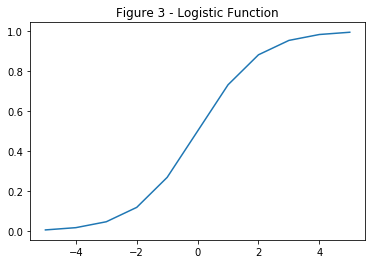

In [123]:
figure3()

As a result, this function outputs a probability (value between 0 and 1) based on a linear combination of features.  In order to find the vector of weights $w$ which maximizes the probability of correctly classifying an instance, we minimize the loss function across our training data: 

$$\sum_{i=1}^{n} ln(1+e^{(y_i<w,x_i>)} $$ 

where y is the classification of the instance (-1 or 1), w is the vector of weights, and x is the vector of features.

## Example (Logistic Regression)

In [120]:
def figure1():
    x = np.arange(-10,11)
    y = x*x + 4*x
    plt.plot(x,y)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Figure 1 - Plot of y = x^2 + 4x")
    plt.show()
    print "Minimum value = ",np.min(y)

In [121]:
def figure2():
    from matplotlib import cm
    x = np.arange(-30,31)
    y = np.arange(-30,31)
    x,y = np.meshgrid(x,y)
    z = x*x + y*y - 10*y + 6*x
    fig = plt.figure()
    ax = fig.add_subplot(111,projection ='3d')
    surface = ax.plot_surface(x,y,z,cmap=cm.coolwarm,linewidth=0, antialiased=False)
    fig.colorbar(surface, shrink=0.5, aspect=5)
    plt.title("Figure 2 - Plot of Convex Surface")
    plt.show()
    print "Minimum value = ",np.min(z)

In [122]:
def figure3():
    x = np.arange(-5,6)
    y = 1/(1+np.exp(-1*x))
    plt.plot(x,y)
    plt.title("Figure 3 - Logistic Function")
    plt.show()

#figure3()

In [97]:
# Test Code

coef = np.array([6,-10])
x = np.array([-3,5])

print x.dot(x.T) + np.sum(x*coef)
print 2*x + coef

from sympy import *
def f(x):
    return x**2 + 4*x

f(-2)

-33
[-2  0]
